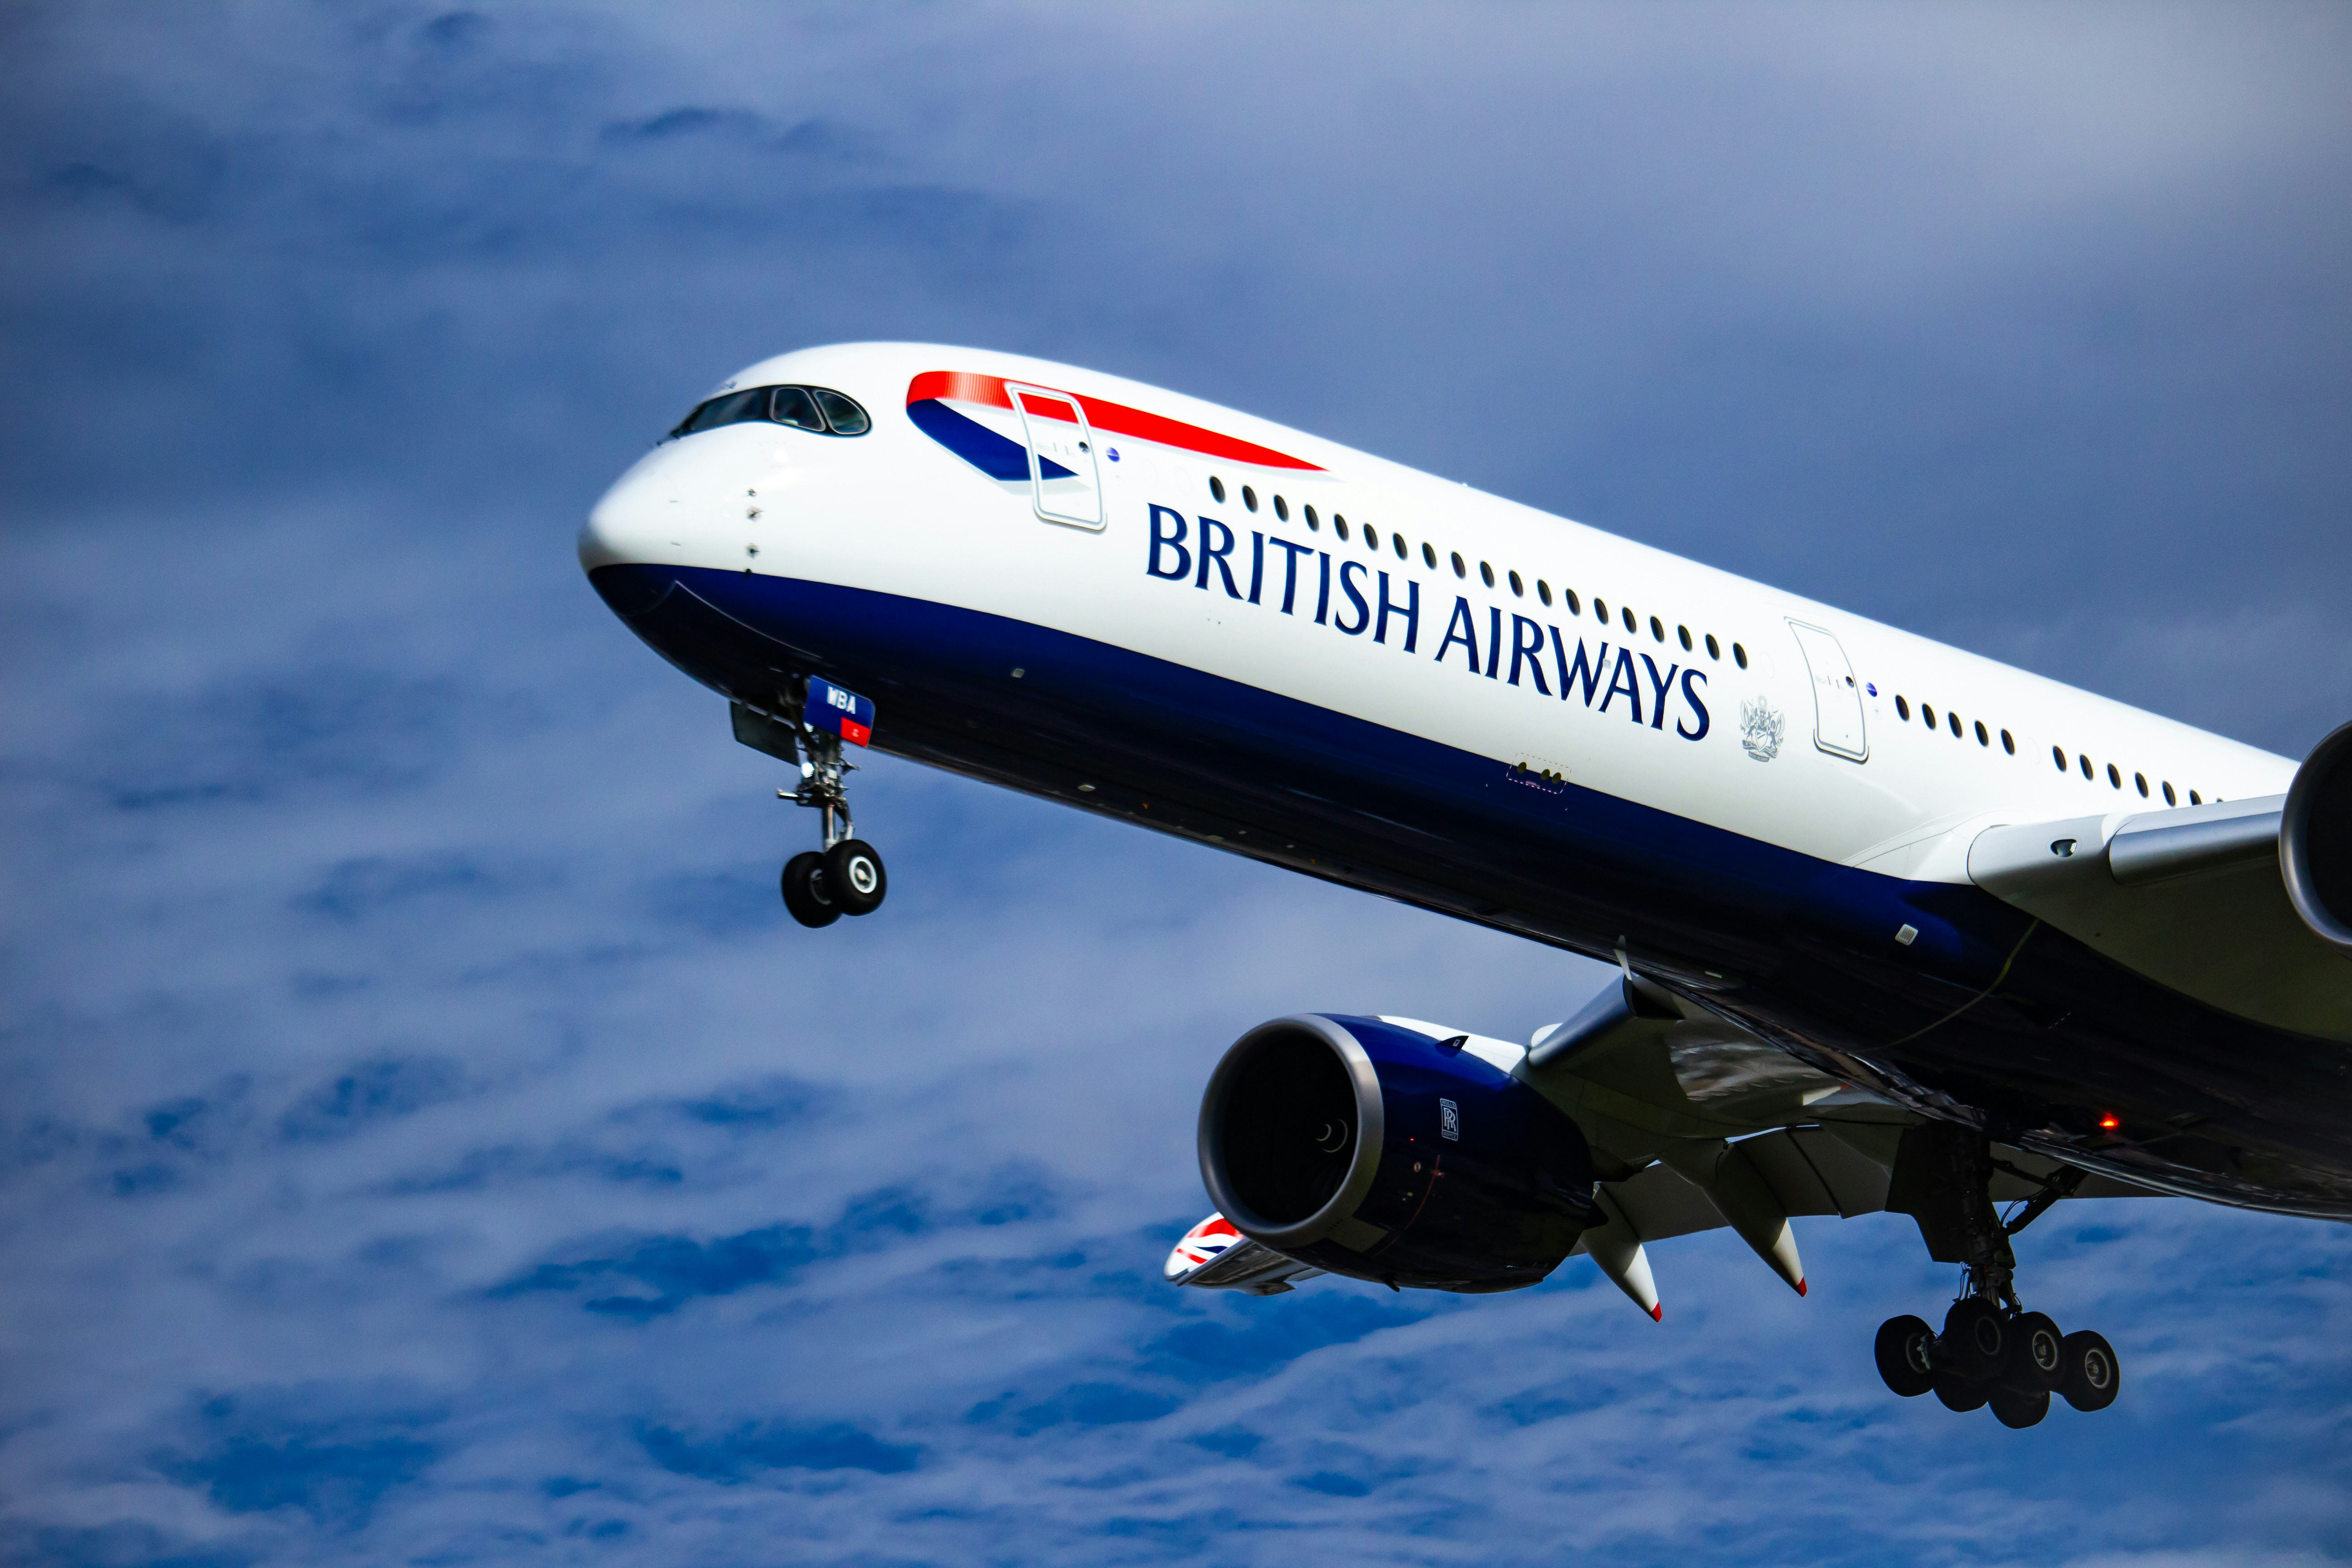

# Predict customer buying behaviour 

## What data tells us?

This dataset contains 50,000 airline customer booking records, capturing various aspects of the booking process and customer preferences. Each row represents an individual booking and includes features such as the `number of passengers`, `trip type` (e.g., one-way or round-trip), days in advance the booking was made (purchase_lead), and duration of stay. It also records flight-specific details like departure hour, day of the week, `route`, and `flight duration`. 

Additionally, the dataset captures customer service preferences, such as whether they opted for extra baggage, preferred seating, or in-flight meals. The key target variable, `booking_complete`, indicates whether the booking was finalized (1) or abandoned (0). 

This dataset is ideal for understanding customer booking behavior, analyzing purchase decisions, and building predictive models to identify factors influencing booking completion.


### Dataset Overview:-
   - `Total Rows` : 50,000
   - `Total Columns` : 14
   - `Dataset Type` : Tabular customer booking record for an airline, possibly related to predicting flight behaviours (like no-shows or cancellations)
 
### Columns & Description:-
   1. `num_passengers` : The number pf passengers included in a single booking. 
  
   2. `sales_channel` : The platform or method used to make the booking(eg., online, travel-agent).
   
   3. `trip_type` : The nature of the trip, such as onw-way or round_trip.
   
   4. `purchase_lead` : Number of days between the booking date and the flight departure date (i.e., how far in advance the flight was booked).
   
   5. `length_of_stay` :	Duration of stay at the destination (in days), applicable mainly for round-trips.
   
   6. `flight_hour` : The scheduled hour of the flight departure (0–23), indicating the time of day.
   
   7. `flight_day` : The day of the week the flight is scheduled to depart (e.g., Monday, Tuesday).
   
   8. `route` : The flight route, typically in the format origin-destination (e.g., NYC-LAX).
   
   9. `booking_origin` : The country or location from where the booking was made.
   
   10. `wants_extra_baggage` : Binary indicator (0 or 1) showing whether the customer opted for extra baggage.
   
   11. `wants_preferred_seat` : Binary indicator (0 or 1) showing whether the customer chose a preferred seat.
   
   12. `wants_in_flight_meals` : Binary indicator (0 or 1) indicating if the customer selected in-flight meals.
   
   13. `flight_duration` : Duration of the flight in hours or minutes.
   
   14. `booking_complete` : Target variable — indicates whether the booking was finalized or not (1 = completed, 0 = not completed).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
BA_data = pd.read_csv("customer_booking.csv", encoding = 'ISO-8859-1')
BA_data.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [3]:
BA_data.shape

(50000, 14)

In [4]:
BA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
# Chekc null values 
print(BA_data.isnull().sum())

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [6]:
# Check for duplicate values 
print(BA_data.duplicated().sum())

719


In [7]:
# Drop duplicates values 
BA_data.drop_duplicates(inplace = True)

In [8]:
BA_data

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0                7        Sat  AKLDEL    New Zealand                    1   
1                3        Sat  AKLDEL    New Zealand                    0   
2               17        Wed  AKLDEL          India                    1   
3                4        Sat  AKLDEL    New Zealand                    0   
4               15        Wed  AKLDEL          India                    1   
...            ...        ...     ...            ...                  ...   
49995            9        Sat  PERPNH      Australia                    1   
49996            4        Sun  PERPNH      Australia                    0   
49997           22        Sat  PERPNH      Australia                    0   
49998           11        Mon  PERPNH      Australia                    1   
49999           10        Thu  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49995                     0                      1             5.62   
49996                     0                      0             5.62   
49997                     0                      1             5.62   
49998                     0                      1             5.62   
49999                     1                      0             5.62   

       booking_complete  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
49995                 0  
49996                 0  
49997                 0  
49998                 0  
49999                 0  

[49281 rows x 14 columns]

In [9]:
BA_data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

# EDA (Exploratory Data Analysis)

- Univariate analysis
- Bivariate analysis
- Multivariate analysis

## Univariate analysis

### num_passengers

<Axes: xlabel='num_passengers'>

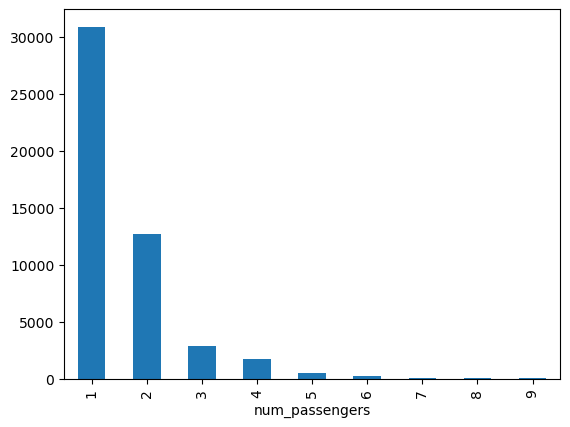

In [10]:
# num_passengers
BA_data['num_passengers'].value_counts().plot(kind = 'bar')

- Mostly single passengers are travelling more than rest of other passengers.
- Large number of passenger like (5 to 9 members) means it look like families travelling.

### sales_channel

In [11]:
# sales_channel
BA_data['sales_channel'].value_counts()

sales_channel
Internet    43917
Mobile       5364
Name: count, dtype: int64

<Axes: ylabel='count'>

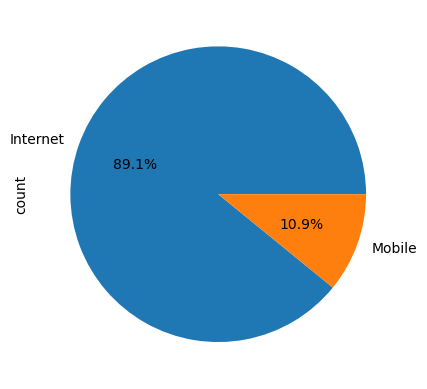

In [12]:
BA_data['sales_channel'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

- Most of passengers are booking their flight through agents(Internet) = 89.1%.
- Less number of passengers are booking their flight from mobile by own = 10.9%.

### trip_type

In [13]:
# trip_type
BA_data['trip_type'].value_counts()

trip_type
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: count, dtype: int64

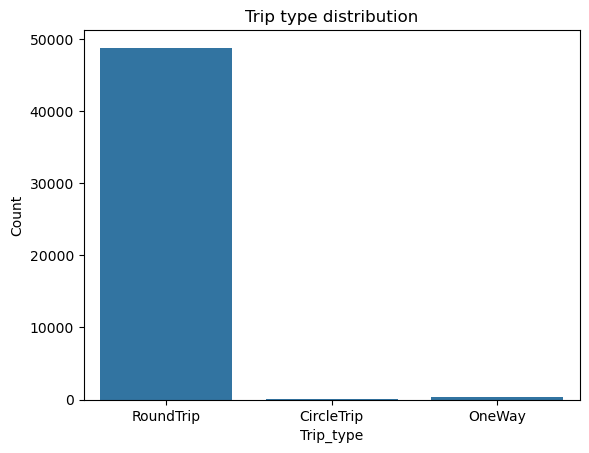

In [14]:
sns.countplot(BA_data, x = 'trip_type')
plt.title('Trip type distribution')
plt.xlabel('Trip_type')
plt.ylabel('Count')
plt.show()

- Most of passengers are doing `roundtrip` .
- Mid number of passengers are doing `Oneway trip` .
- Very less number of passengers are doing `Circle trip`.  

### purchase_lead

In [15]:
# purchase_lead
BA_data['purchase_lead'].value_counts()

purchase_lead
1      681
2      666
6      649
7      636
5      611
      ... 
605      1
435      1
483      1
606      1
867      1
Name: count, Length: 470, dtype: int64

In [16]:
BA_data['purchase_lead'].describe()

count    49281.000000
mean        84.723281
std         90.410229
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64

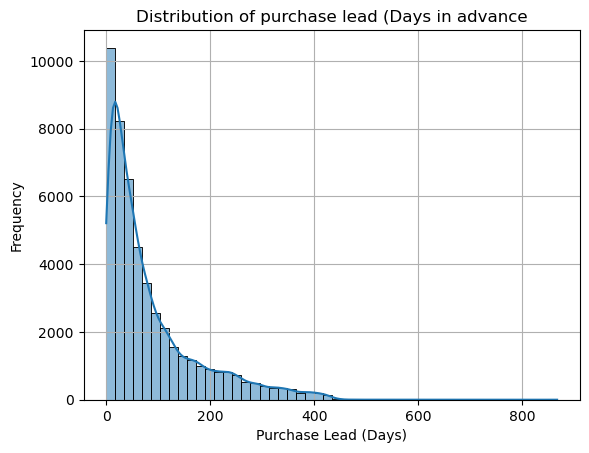

In [17]:
sns.histplot(BA_data['purchase_lead'], bins = 50, kde = True)
plt.title('Distribution of purchase lead (Days in advance')
plt.xlabel('Purchase Lead (Days)')
plt.ylabel('Frequency')
plt.grid(True)

- This plot shows a right skewed distribution of `purchase lead` with frequency.
- Most of passengers are booked their flights between `0 to 450` days.

### length_of_stay

In [18]:
# length_of_stay
BA_data['length_of_stay'].value_counts()

length_of_stay
6      7611
5      7151
4      5568
3      2798
17     1823
       ... 
399       1
341       1
573       1
216       1
211       1
Name: count, Length: 335, dtype: int64

In [19]:
BA_data['length_of_stay'].describe()

count    49281.000000
mean        23.053976
std         33.832149
min          0.000000
25%          5.000000
50%         17.000000
75%         28.000000
max        778.000000
Name: length_of_stay, dtype: float64

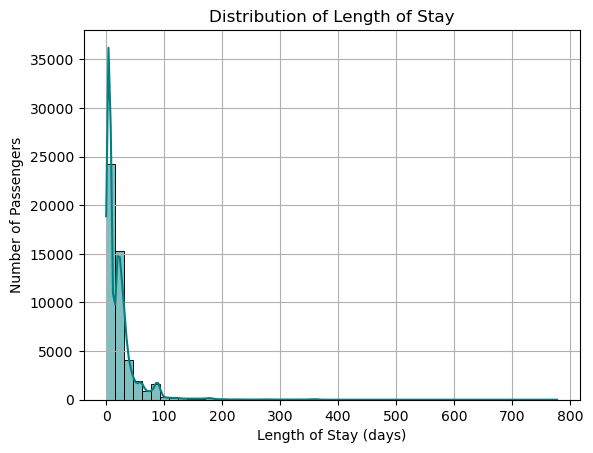

In [20]:
sns.histplot(BA_data['length_of_stay'], bins = 50, kde = True, color = 'teal')
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Passengers')
plt.grid(True)

- Most of passengers are staying between `0 to 100` days.
- This plot shows `right skewed` distribution of length of stay with no. of passengers.

### flight_hour

In [21]:
# flight_hour
BA_data['flight_hour'].value_counts()

flight_hour
8     3125
12    3114
9     3097
7     3080
11    3071
10    3050
13    3046
6     3010
5     2817
4     2786
14    2783
3     2616
2     2596
15    2201
1     2071
16    1536
0     1501
23     975
17     848
22     573
18     430
21     386
19     294
20     275
Name: count, dtype: int64

Text(0, 0.5, 'Number of Flights')

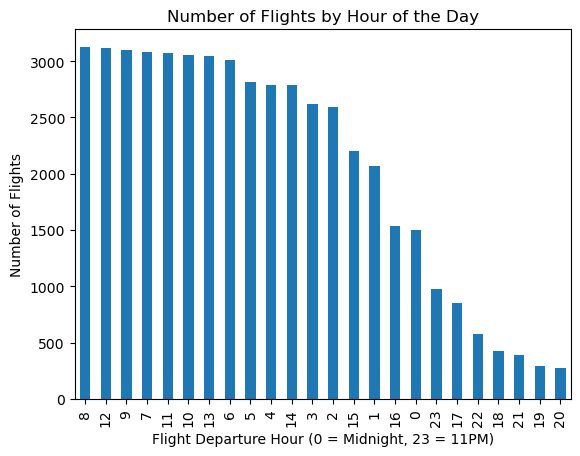

In [22]:
BA_data['flight_hour'].value_counts().plot(kind = 'bar')
plt.title('Number of Flights by Hour of the Day')
plt.xlabel('Flight Departure Hour (0 = Midnight, 23 = 11PM)')
plt.ylabel('Number of Flights')

- Most of the flights have high number of departure on day.
- Less number of flights departure at `0 = midnight` and `23 = 11PM` that means less numbers of passengers are travelling at this time.

### flight_day

In [23]:
# flight_day
BA_data['flight_day'].value_counts()

flight_day
Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: count, dtype: int64

Text(0, 0.5, 'Flight count')

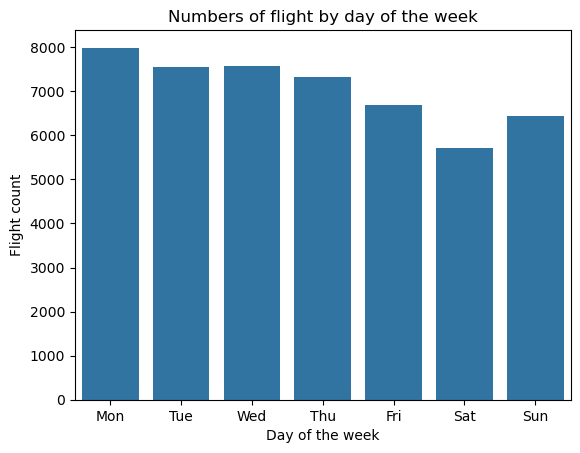

In [24]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(BA_data, x = 'flight_day', order = day_order)
plt.title("Numbers of flight by day of the week")
plt.xlabel('Day of the week')
plt.ylabel('Flight count')

- Higher number of flights are fly on `Monday`.
- Mid number of flights are fly on `Tuesday`, `Wednesday`, `Thursday` in comparision to Higher.
- less numner of flights are fly on `Friday`, `Saturday`, `Sunday` in comparision to Mid and Higher.

### route
- Finding top 10 most frequent routes

In [25]:
BA_data['route'].value_counts()

route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
CKGKNO       1
KBRWUH       1
JEDMFM       1
KTMTWU       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [26]:
top_routes = BA_data['route'].value_counts().nlargest(10)
top_routes

route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
ICNSYD     683
DMKPER     677
DPSICN     658
DMKOOL     652
MELTPE     637
Name: count, dtype: int64

Text(0, 0.5, 'Routes')

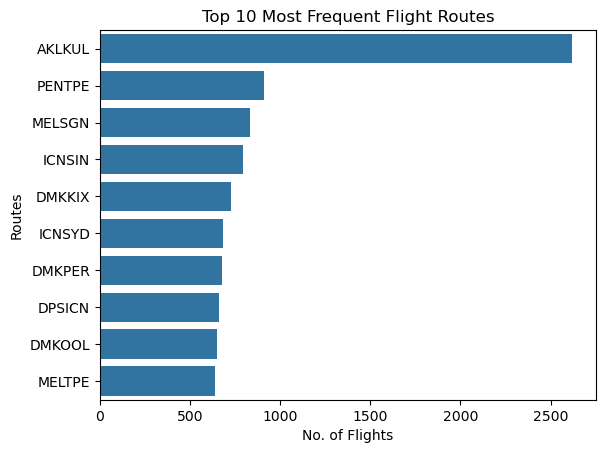

In [27]:
sns.barplot(x = top_routes.values, y = top_routes.index)
plt.title('Top 10 Most Frequent Flight Routes')
plt.xlabel('No. of Flights')
plt.ylabel('Routes')

1. AKLKUL = `Auckland`, New Zealand --> `Kuala Lumpur`, Malaysia
2. PENTPE = `Penang`, Malaysia --> `Taipei (Taoyuan)`, Taiwan
3. MELSGN = `Melbourne`, Australia --> `Ho Chi Minh City`, Vietnam
4. ICNSIN = `Seoul (Incheon)`, South Korea --> `Singapore`
5. DMKKIX = `Bangkok (Don Mueang)`, Thailand --> `Osaka (Kansai)`, Japan
6. ICNSYD = `Seoul (Incheon)`, South Korea --> `Sydney`, Australia
7. DMKPER = `Bangkok (Don Mueang)`, Thailand --> `Perth`, Australia
8. DPSICN = `Denpasar (Bali)`, Indonesia --> `Seoul (Incheon)`, South Korea
9. DMKOOL = `Bangkok (Don Mueang)`, Thailand --> `Ubon Ratchathani`, Thailand
10. MELTPE = `Melbourne`, Australia --> `Taipei (Taoyuan)`, Taiwan

### booking_origin
- Findings top 10 most frequent booking_origin

In [28]:
BA_data['booking_origin'].value_counts()

booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Ghana                       1
Gibraltar                   1
Guatemala                   1
Algeria                     1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [29]:
top_booking_origin = BA_data['booking_origin'].value_counts().nlargest(10)
top_booking_origin

booking_origin
Australia      17691
Malaysia        7055
South Korea     4502
Japan           3819
China           3284
Indonesia       2317
Taiwan          2042
Thailand        1993
India           1258
New Zealand     1060
Name: count, dtype: int64

Text(0, 0.5, 'Origins')

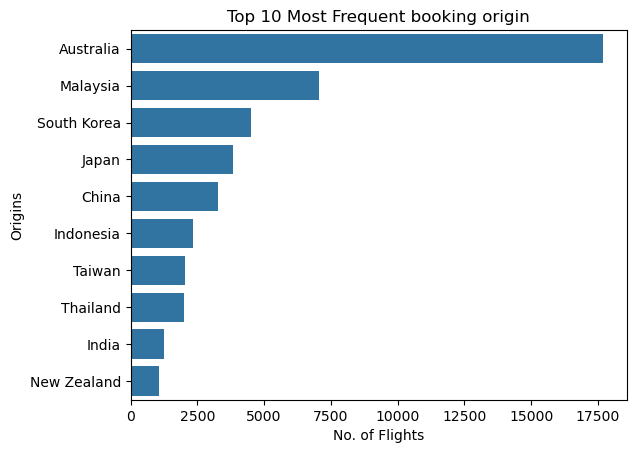

In [30]:
sns.barplot(x = top_booking_origin.values, y = top_booking_origin.index)
plt.title('Top 10 Most Frequent booking origin')
plt.xlabel('No. of Flights')
plt.ylabel('Origins')

In [31]:
# Columns
# 
# 'flight_duration', 'booking_complete'

### wants_extra_baggage
- 1 = Passengers wants extra baggage
- 0 = Passengers does not want extra baggage

In [32]:
BA_data['wants_extra_baggage'].value_counts()

wants_extra_baggage
1    32931
0    16350
Name: count, dtype: int64

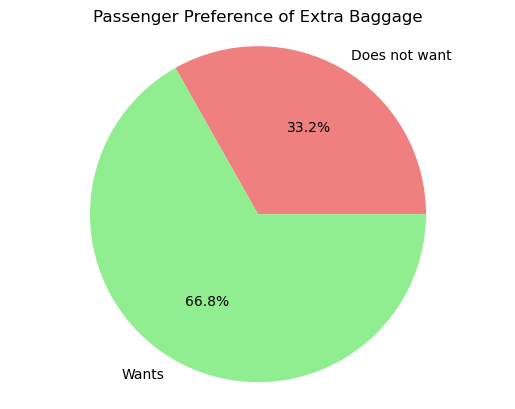

In [33]:
labels = ['Does not want', 'Wants']
sizes = [16350,32931]

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', colors = ['lightcoral','lightgreen'])
plt.title('Passenger Preference of Extra Baggage')
plt.axis('equal')
plt.show()

### wants_preferred_seat
- 1 = Passengers wants preferred seat
- 0 = Passengers does not want preferred seat

In [34]:
BA_data['wants_preferred_seat'].value_counts()

wants_preferred_seat
0    34712
1    14569
Name: count, dtype: int64

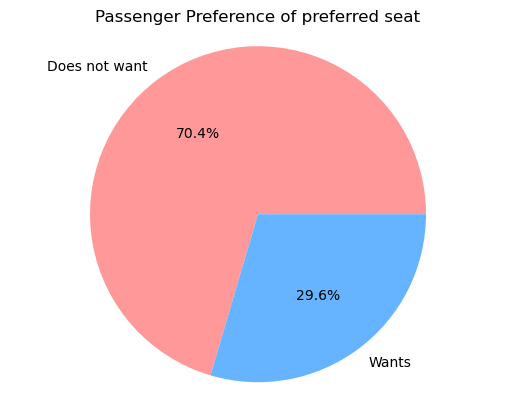

In [35]:
labels = ['Does not want', 'Wants']
sizes = [34712,14569]

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', colors = ['#ff9999', '#66b3ff'])
plt.title('Passenger Preference of preferred seat')
plt.axis('equal')
plt.show()

### wants_in_flight_meals
- 1 = Passengers wants meals
- 0 = Passengers does not want meals

In [36]:
BA_data['wants_in_flight_meals'].value_counts()

wants_in_flight_meals
0    28256
1    21025
Name: count, dtype: int64

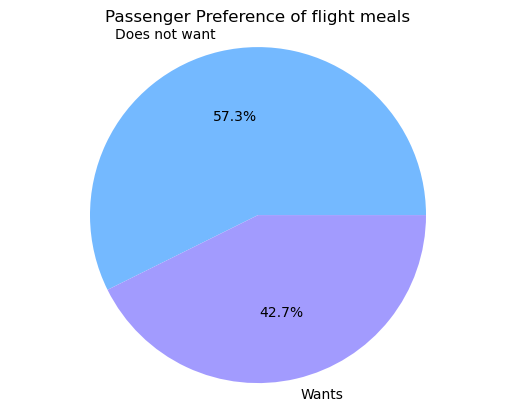

In [37]:
labels = ['Does not want', 'Wants']
sizes = [28256,21025]

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', colors = ['#74b9ff', '#a29bfe'])
plt.title('Passenger Preference of flight meals')
plt.axis('equal')
plt.show()

### flight_duration

In [38]:
BA_data['flight_duration'].value_counts()

flight_duration
8.83    14339
8.58     6892
5.62     5464
6.62     4658
7.00     3314
7.57     2785
4.67     2699
6.42     1708
5.33     1506
4.75     1246
6.33     1178
8.67      787
5.52      664
5.07      501
4.72      486
8.15      299
5.00      237
7.42      221
4.83      145
5.13      116
9.50       36
Name: count, dtype: int64

In [39]:
BA_data['flight_duration'].describe()

count    49281.000000
mean         7.279974
std          1.496390
min          4.670000
25%          5.620000
50%          7.570000
75%          8.830000
max          9.500000
Name: flight_duration, dtype: float64

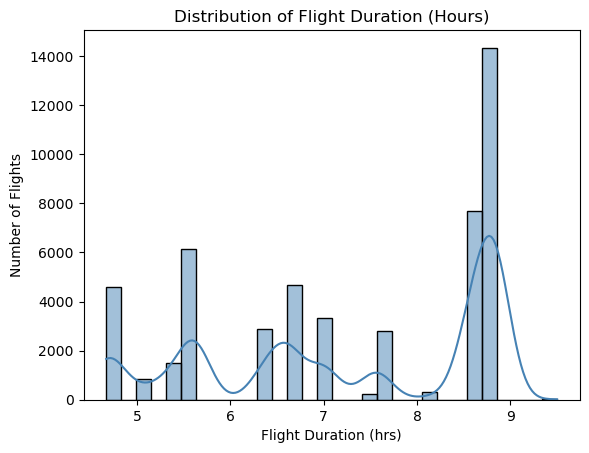

In [40]:
sns.histplot(BA_data['flight_duration'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Flight Duration (Hours)')
plt.xlabel('Flight Duration (hrs)')
plt.ylabel('Number of Flights')
plt.show()

### booking_complete
- 1 = Completed
- 0 = Not Completed

In [41]:
BA_data['booking_complete'].value_counts()

booking_complete
0    41890
1     7391
Name: count, dtype: int64

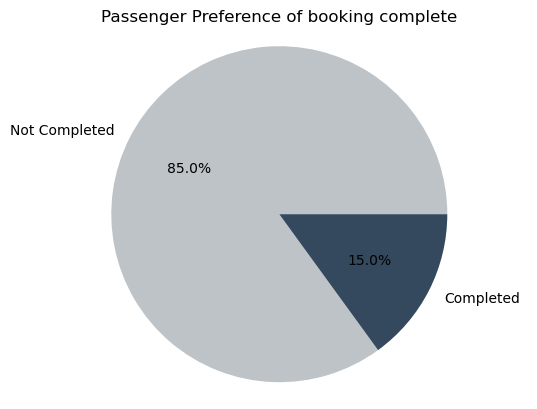

In [42]:
labels = ['Not Completed', 'Completed']
sizes = [41890,7391]

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', colors = ['#bdc3c7', '#34495e'])
plt.title('Passenger Preference of booking complete')
plt.axis('equal')
plt.show()

# Bivariate analysis

In [43]:
BA_data

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0                7        Sat  AKLDEL    New Zealand                    1   
1                3        Sat  AKLDEL    New Zealand                    0   
2               17        Wed  AKLDEL          India                    1   
3                4        Sat  AKLDEL    New Zealand                    0   
4               15        Wed  AKLDEL          India                    1   
...            ...        ...     ...            ...                  ...   
49995            9        Sat  PERPNH      Australia                    1   
49996            4        Sun  PERPNH      Australia                    0   
49997           22        Sat  PERPNH      Australia                    0   
49998           11        Mon  PERPNH      Australia                    1   
49999           10        Thu  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49995                     0                      1             5.62   
49996                     0                      0             5.62   
49997                     0                      1             5.62   
49998                     0                      1             5.62   
49999                     1                      0             5.62   

       booking_complete  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
49995                 0  
49996                 0  
49997                 0  
49998                 0  
49999                 0  

[49281 rows x 14 columns]

In [44]:
BA_data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

### num_passengers & booking_complete

Text(0, 0.5, 'No. of Bookings')

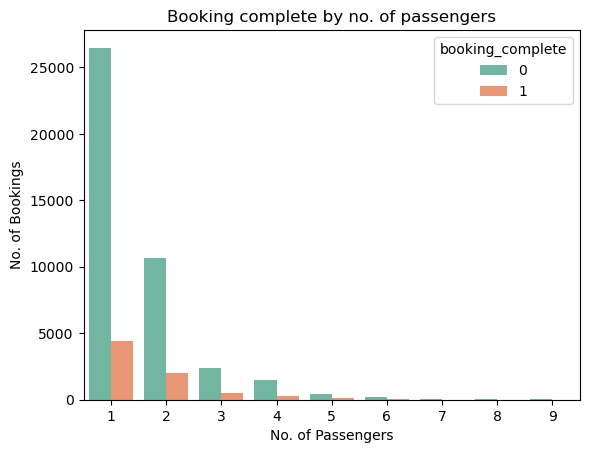

In [45]:
sns.countplot(BA_data, x = 'num_passengers', hue = 'booking_complete', palette = 'Set2')
plt.title("Booking complete by no. of passengers")
plt.xlabel("No. of Passengers")
plt.ylabel("No. of Bookings")

### sales_channel & booking_complete

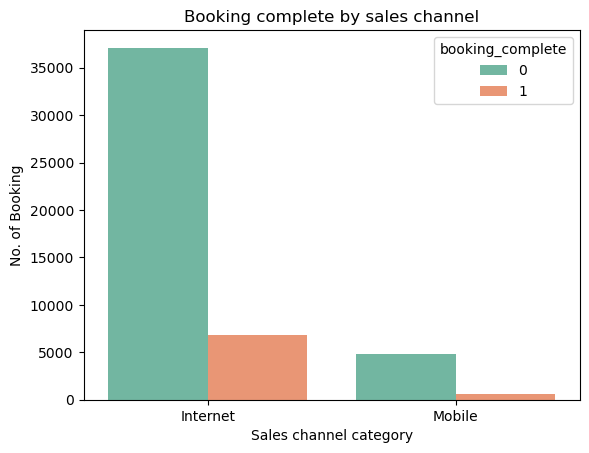

In [46]:
sns.countplot(BA_data, x = 'sales_channel', hue = 'booking_complete', palette = 'Set2')
plt.title("Booking complete by sales channel")
plt.xlabel("Sales channel category")
plt.ylabel("No. of Booking")
plt.show()

### trip_type & booking_complete

Text(0, 0.5, 'No. of Booking')

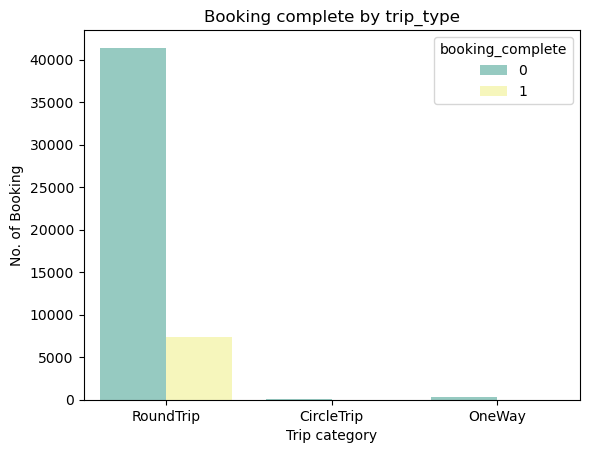

In [47]:
sns.countplot(BA_data, x = 'trip_type', hue = 'booking_complete', palette = 'Set3')
plt.title("Booking complete by trip_type")
plt.xlabel("Trip category")
plt.ylabel("No. of Booking")

### purchase_lead & length_of_stay

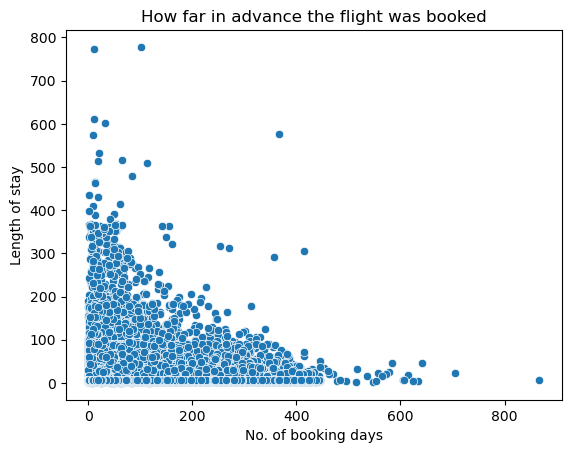

In [48]:
sns.scatterplot(BA_data, x = 'purchase_lead', y = 'length_of_stay')
plt.title("How far in advance the flight was booked")
plt.xlabel('No. of booking days')
plt.ylabel('Length of stay')
plt.show()

- Early planning for the longer trips

### length_of_stay & flight_duration

<Axes: xlabel='flight_duration', ylabel='length_of_stay'>

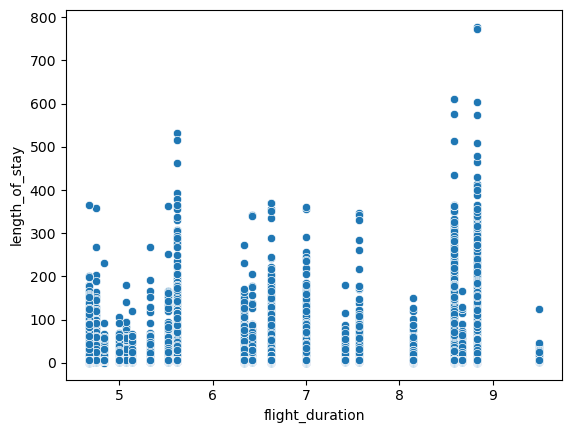

In [49]:
sns.scatterplot(BA_data, x = 'flight_duration', y = 'length_of_stay')

- Longer flights --> longer stays?

### flight_hour & route

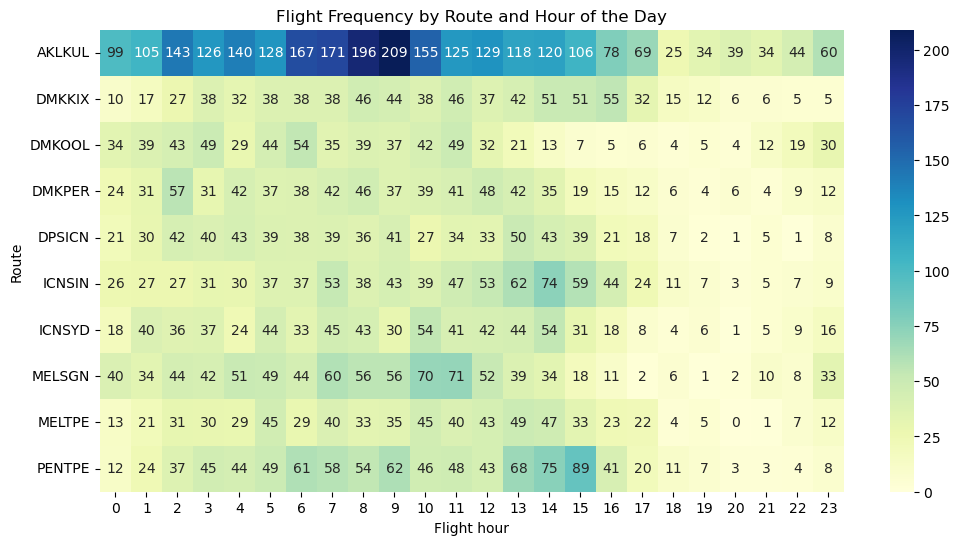

In [50]:
# Get top routes
top_route = BA_data['route'].value_counts().nlargest(10).index

# Filter dataset to only those top routes
subset = BA_data[BA_data['route'].isin(top_route)]

# Create a pivot table (route x hour)
pivot = pd.crosstab(subset['route'], subset['flight_hour'])

# plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Flight Frequency by Route and Hour of the Day')
plt.xlabel('Flight hour')
plt.ylabel('Route')
plt.show()

1. AKLKUL = `Auckland`, New Zealand --> `Kuala Lumpur`, Malaysia
2. DMKKIX = `Bangkok (Don Mueang)`, Thailand --> `Osaka (Kansai)`, Japan
3. DMKOOL = `Bangkok (Don Mueang)`, Thailand --> `Ubon Ratchathani`, Thailand
4. DMKPER = `Bangkok (Don Mueang)`, Thailand --> `Perth`, Australia
5. DPSICN = `Denpasar (Bali)`, Indonesia --> `Seoul (Incheon)`, South Korea
6. ICNSIN = `Seoul (Incheon)`, South Korea --> `Singapore`
7. ICNSYD = `Seoul (Incheon)`, South Korea --> `Sydney`, Australia
8. MELSGN = `Melbourne`, Australia --> `Ho Chi Minh City`, Vietnam
9. MELTPE = `Melbourne`, Australia --> `Taipei (Taoyuan)`, Taiwan
10. PENTPE = `Penang`, Malaysia --> `Taipei (Taoyuan)`, Taiwan

In [51]:
BA_data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

### flight_day & booking_complete

<Axes: xlabel='sales_channel', ylabel='count'>

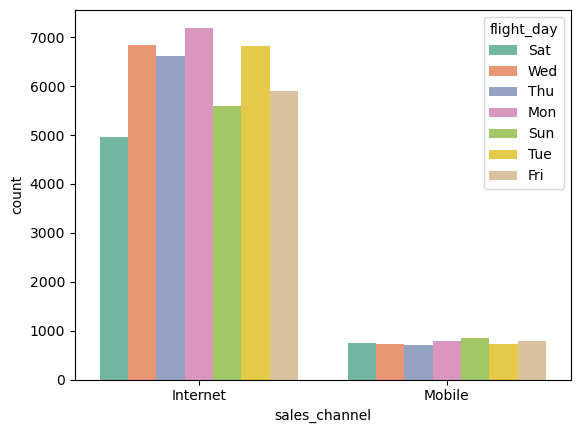

In [64]:
sns.countplot(BA_data, x = 'sales_channel', hue = 'flight_day', palette = 'Set2')

### wants_extra_baggage & num_passengers

Text(0, 0.5, 'Total passengers')

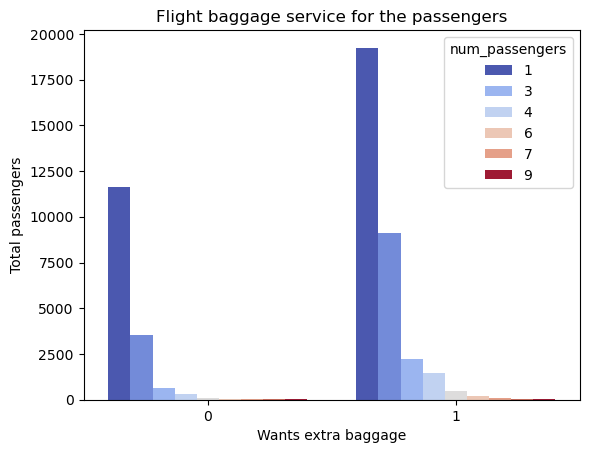

In [77]:
sns.countplot(BA_data, x = 'wants_extra_baggage', hue = 'num_passengers', palette = 'coolwarm')
plt.title("Flight baggage service for the passengers")
plt.xlabel('Wants extra baggage')
plt.ylabel('Total passengers')

### wants_preferred_seat & num_passengers

Text(0, 0.5, 'Total passengers')

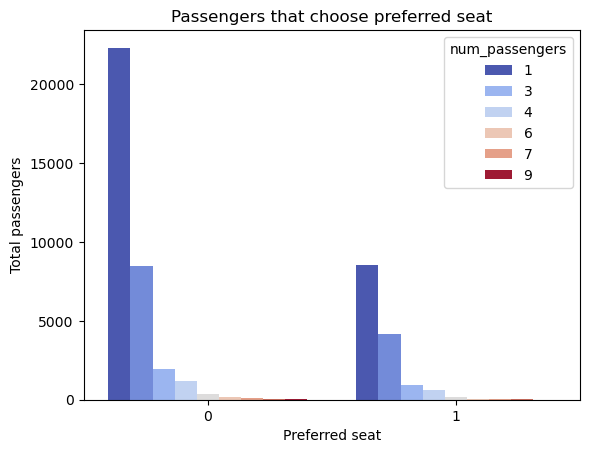

In [79]:
sns.countplot(BA_data, x = 'wants_preferred_seat', hue = 'num_passengers', palette = 'coolwarm')
plt.title("Passengers that choose preferred seat")
plt.xlabel('Preferred seat')
plt.ylabel('Total passengers')

### wants_in_flight_meals & num_passengers

Text(0, 0.5, 'Total passengers')

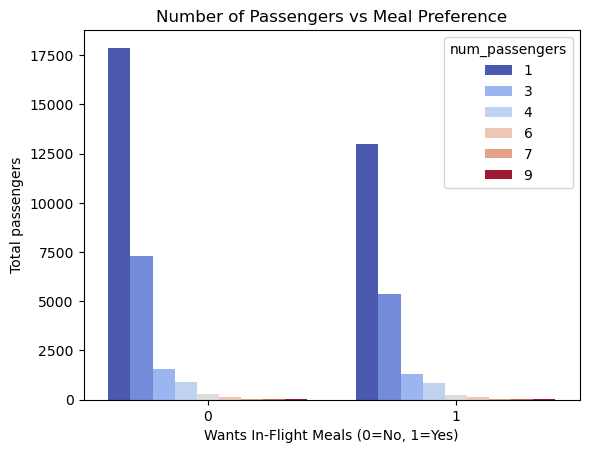

In [84]:
sns.countplot(BA_data, x = 'wants_in_flight_meals', hue = 'num_passengers', palette = 'coolwarm')
plt.title("Number of Passengers vs Meal Preference")
plt.xlabel('Wants In-Flight Meals (0=No, 1=Yes)')
plt.ylabel('Total passengers')

# Multivariate analysis

### `flight_duration`, `purchase_lead`, `length_of_stay`, `num_passengers`

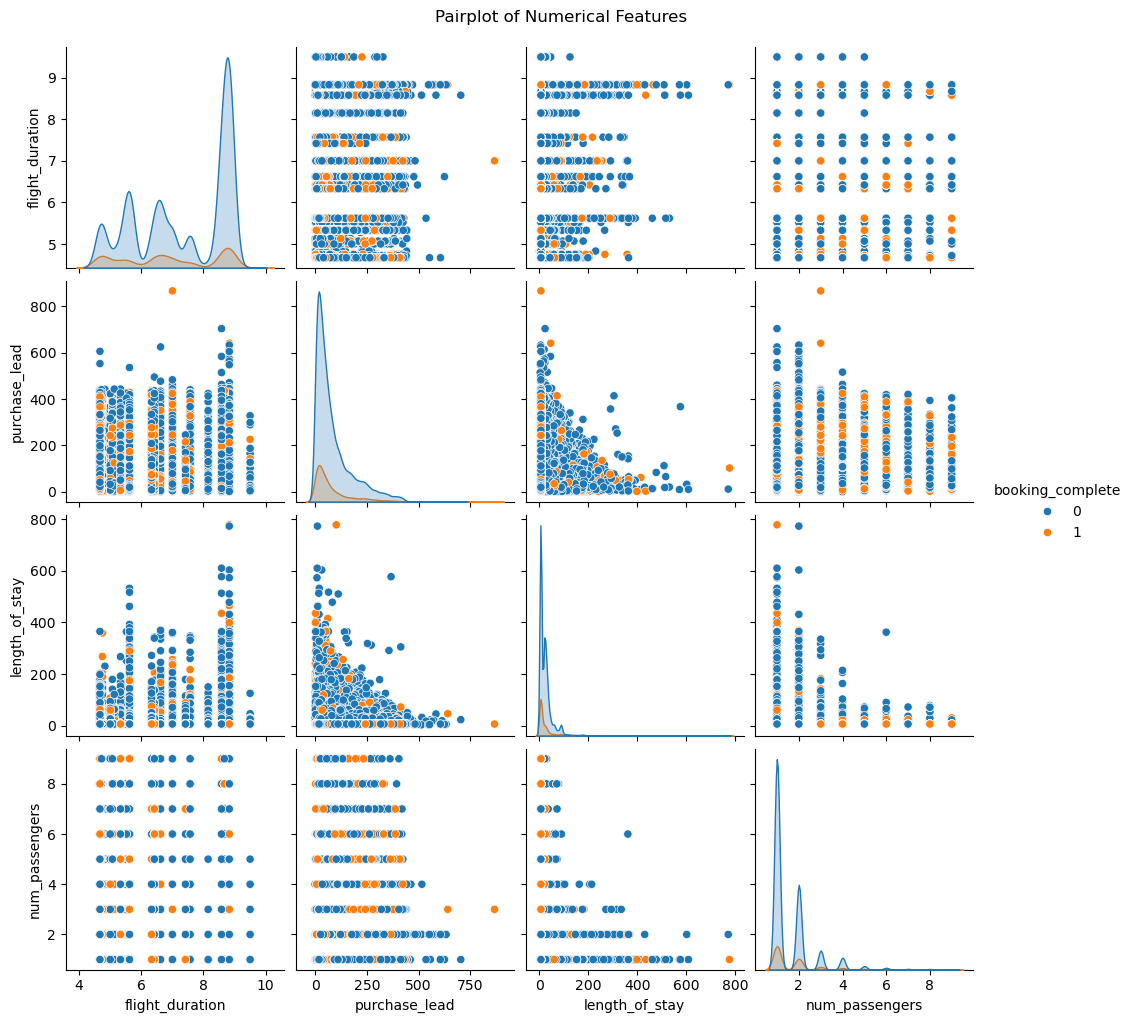

In [86]:
num_cols = ['flight_duration', 'purchase_lead', 'length_of_stay', 'num_passengers']
sns.pairplot(BA_data[num_cols + ['booking_complete']], hue='booking_complete')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

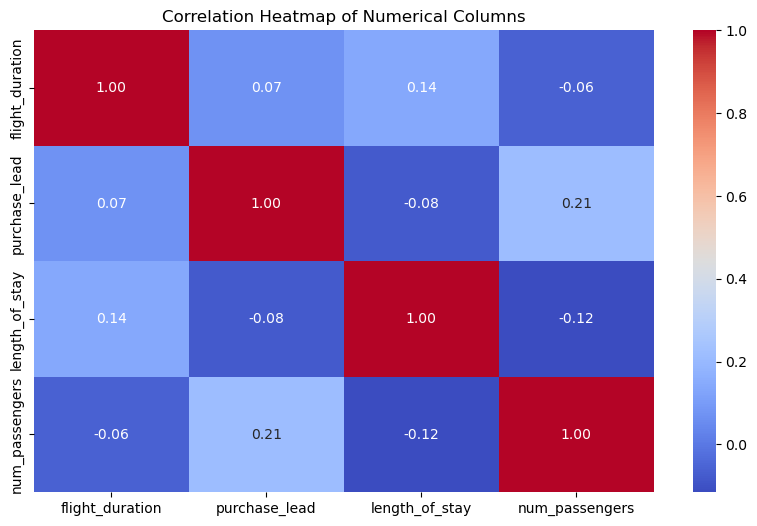

In [87]:
plt.figure(figsize=(10, 6))
corr = BA_data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()


# Statistical description 

In [89]:
BA_data['num_passengers'].describe()

count    49281.000000
mean         1.590187
std          1.016538
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: num_passengers, dtype: float64

In [90]:
BA_data['purchase_lead'].describe()

count    49281.000000
mean        84.723281
std         90.410229
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64

In [91]:
BA_data['length_of_stay'].describe()

count    49281.000000
mean        23.053976
std         33.832149
min          0.000000
25%          5.000000
50%         17.000000
75%         28.000000
max        778.000000
Name: length_of_stay, dtype: float64

In [92]:
BA_data['flight_hour'].describe()

count    49281.000000
mean         9.070676
std          5.413099
min          0.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         23.000000
Name: flight_hour, dtype: float64

In [93]:
BA_data['flight_duration'].describe()

count    49281.000000
mean         7.279974
std          1.496390
min          4.670000
25%          5.620000
50%          7.570000
75%          8.830000
max          9.500000
Name: flight_duration, dtype: float64